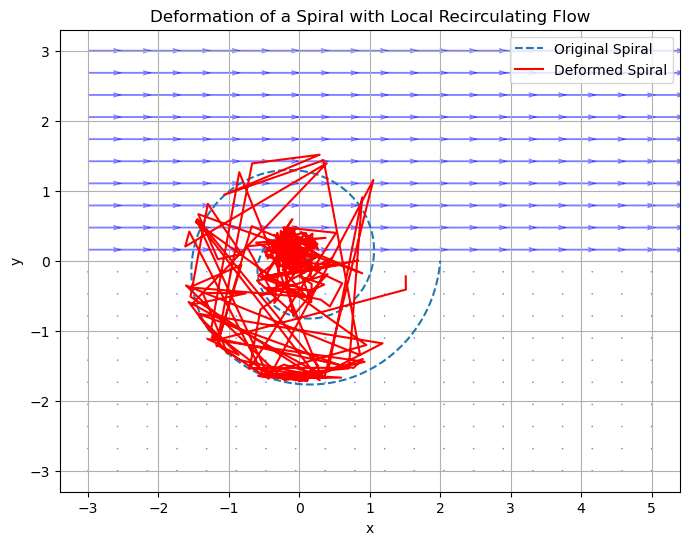

In [32]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Define the velocity field with unidirectional flow above the tail and recirculation around the spiral
def velocity_field(t, r):
    x, y = r
    # Constant flow to the right above y=0
    u = 1.0 if y > 0 else 0.0
    v = 0.0
    
    # Add recirculation effect around the spiral
    strength = 1.0  # Vortex strength
    for cx, cy in zip(x_init, y_init):
        dx, dy = x - cx, y - cy
        distance = np.hypot(dx, dy)
        if distance > 0.1:  # Avoid singularity at the vortex center
            u += -strength * dy / (distance**2)
            v += strength * dx / (distance**2)
    return [u, v]

# Generate initial spiral with a deformable tail
theta = np.linspace(0, 4 * np.pi, 200)
r = np.linspace(0.1, 2.0, 200)
x_init = r * np.cos(theta)
y_init = r * np.sin(theta)

# Integrate the deformation of the spiral under the velocity field
time_span = [0, 5]  # Time duration for evolution
deformed_points = []

for x0, y0 in zip(x_init, y_init):
    sol = solve_ivp(velocity_field, time_span, [x0, y0], t_eval=[time_span[1]])
    deformed_points.append(sol.y[:, -1])

deformed_points = np.array(deformed_points)

# Plotting the original and deformed spiral
plt.figure(figsize=(8, 6))
plt.plot(x_init, y_init, label='Original Spiral', linestyle='--')
plt.plot(deformed_points[:, 0], deformed_points[:, 1], label='Deformed Spiral', color='r')

# Show the background velocity field as a quiver plot
X, Y = np.meshgrid(np.linspace(-3, 5, 20), np.linspace(-3, 3, 20))
U = np.where(Y > 0, 1.0, 0.0)  # Horizontal flow only above y=0
V = np.zeros_like(Y)  # No vertical flow
plt.quiver(X, Y, U, V, color='b', alpha=0.5)

plt.xlabel('x')
plt.ylabel('y')
plt.title('Deformation of a Spiral with Local Recirculating Flow')
plt.legend()
plt.grid(True)
plt.show()
